In [160]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [161]:
class BodyWeight():
    """Model do obliczania zmiany masy ciała w czasie.
    Args:
        t (int): Czas trwania symulacji. [dni]
        m (float): Początkowa masa ciała [kg].
        h (int): Wzrost [cm].
        a (int): Wiek [lat].
        c (int): Dzienna liczba spożywanych kalorii [kcal].
        f (float): Poziom aktywności fizycznej.
        sex (str): Płeć - 'k' dla kobiety, 'm' dla mężczyzny.
    """
    def __init__(self, t, m, h, a, c, f, sex):
        self.t = t
        self.m = m
        self.h = h
        self.a = a
        self.c = c
        self.f = f
        if sex == "k":
            self.s = -161
        elif sex == "m":
            self.s = 5
        self.result_euler = []
        self.result_runge_kutta = []
        self.result_analytical = []
        self.time_euler = []
        self.time_runge_kutta = []

    def BMR(self):
        """ Oblicz podstawową przemianę materii (BMR). """
        P = 10 * self.m + 6.25 * self.h - 5 * self.a + self.s
        return P

    def dm_dt(self, m):
        dm = (self.c - self.f * (10 * m + 6.25 * self.h - 5 * self.a + self.s)) / 7700
        return dm
    
    def final_weight_euler(self):
        """ Oblicz zmianę masy ciała po upływie czasu t - metoda Eulera. """
        h = 0.001 # krok czasowy
        n = int(self.t / h)  # liczba kroków
        t = 0
        m = self.m
        for i in range(n):
            m = m + self.dm_dt(m) * h
            t = t + h
            self.time_euler.append(t)
            self.result_euler.append(m)
        return m
    
    def final_weight_runge_kutta(self):
        """ Oblicz zmianę masy ciała po upływie czasu t - metoda Runge-Kutta. """
        h = 0.001  # krok czasowy
        n = int(self.t / h)  # liczba kroków
        t = 0
        m = self.m
        for i in range(n):
            k1 = h * self.dm_dt(m)
            k2 = h * self.dm_dt(m + 0.5 * k1)
            k3 = h * self.dm_dt(m + 0.5 * k2)
            k4 = h * self.dm_dt(m + k3)
            m = m + (1.0 / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
            t = t + h
            self.time_runge_kutta.append(t)
            self.result_runge_kutta.append(m)
        return m
    
    def final_weight_analytical(self, time):
        """ Oblicz zmianę masy ciała po upływie czasu t - implementacja równania obliczonego numerycznie. """
        for t in range(1,time+1):
            m = (self.m - (self.c - self.f * (6.25*self.h - 5*self.a + self.s)) / (10 * self.f)) * math.exp(-self.f*t/770) + (self.c - self.f * (6.25 * self.h - 5 * self.a + self.s)) / (10 * self.f)
            self.result_analytical.append(m)
        return self.result_analytical[-1]
    
    # wykres na podstawie wyników uzyskanych z metody Eulera
    def all_weights(self):
        plt.figure(figsize=(8, 6)) 
        plt.plot(self.time_euler, self.result_euler) 
        plt.xlabel('Czas [dni]')
        plt.ylabel('Masa ciała [kg]')
        plt.title(f'Zmiana masy ciała')
        plt.grid()
        plt.show()

60.55682422940102
60.55683610147214
60.55683610146999


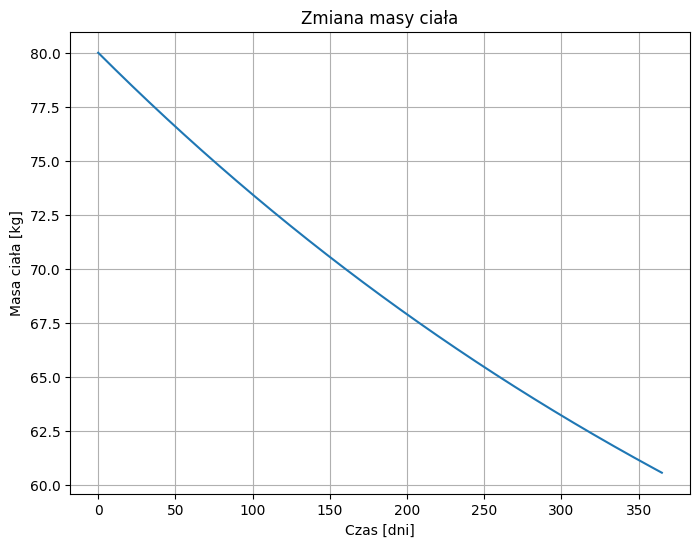

In [162]:
Ania = BodyWeight(t=365, m=80, h=170, a=25, c=1500, f=1.3, sex="k")
print(Ania.final_weight_euler())
print(Ania.final_weight_runge_kutta())
print(Ania.final_weight_analytical(365))
Ania.all_weights()